# Task
Build a machine learning pipeline for image classification using the MNIST dataset. The pipeline should include data loading and preprocessing, training and evaluation of a traditional ML model (Logistic Regression or SVM) as a baseline, building and evaluating a simple CNN model, comparing the performance of both models, and a reflection on the ethics of using such models.

## Load and preprocess data

### Subtask:
Load the MNIST dataset, normalize pixel values, and split the data into training and test sets.


In [9]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to include the channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


## Train and evaluate baseline model

### Subtask:
Flatten the images, train a Logistic Regression model, and evaluate its performance using accuracy and a confusion matrix.


In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Flatten the training and test image data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("Flattened training data shape:", x_train_flat.shape)
print("Flattened test data shape:", x_test_flat.shape)

# Instantiate a LogisticRegression object
logistic_regression_model = LogisticRegression(max_iter=1000)

# Train the LogisticRegression model
logistic_regression_model.fit(x_train_flat, y_train)

# Predict the labels for the flattened test image data
y_pred = logistic_regression_model.predict(x_test_flat)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy and the confusion matrix
print("\nLogistic Regression Model Performance:")
print("Accuracy:", accuracy)


Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)

Logistic Regression Model Performance:
Accuracy: 0.9259


## Build, train, and evaluate deep learning model

### Subtask:
Build a simple CNN model, train it on the MNIST dataset, and evaluate its performance.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
history = cnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the CNN model
loss, accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)

# Print the evaluation results
print("\nCNN Model Performance:")
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8848 - loss: 0.3760 - val_accuracy: 0.9842 - val_loss: 0.0544
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9832 - loss: 0.0553 - val_accuracy: 0.9875 - val_loss: 0.0414
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9888 - loss: 0.0379 - val_accuracy: 0.9867 - val_loss: 0.0455
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9913 - loss: 0.0287 - val_accuracy: 0.9898 - val_loss: 0.0356
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9932 - loss: 0.0208 - val_accuracy: 0.9893 - val_loss: 0.0399

CNN Model Performance:
Test loss: 0.0339
Test accuracy: 0.9898


## Compare models

### Subtask:
Compare the performance of the Logistic Regression and CNN models.


In [12]:
# Accuracy of Logistic Regression (from previous output)
lr_accuracy = 0.9259

# Accuracy of CNN (from current environment)
cnn_accuracy = accuracy

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")

print("\nPerformance Comparison:")
print(f"The CNN model performed better than the Logistic Regression model.")
print(f"The CNN model achieved an accuracy of {cnn_accuracy:.4f}, while the Logistic Regression model achieved an accuracy of {lr_accuracy:.4f}.")
print(f"The difference in accuracy is approximately {cnn_accuracy - lr_accuracy:.4f}.")

print("\nPotential Reasons for Performance Difference:")
print("1. Nature of the models: CNNs are specifically designed to handle image data by extracting hierarchical features through convolutional and pooling layers. Logistic Regression is a linear model that treats each pixel as an independent feature, losing spatial relationships.")
print("2. Feature extraction: CNNs automatically learn relevant features from the images, whereas Logistic Regression relies on the raw pixel values (or simple handcrafted features if any preprocessing is done).")
print("3. Model complexity: CNNs are generally more complex models with more parameters, allowing them to capture intricate patterns in the image data that a simpler linear model like Logistic Regression cannot.")

Logistic Regression Accuracy: 0.9259
CNN Accuracy: 0.9898

Performance Comparison:
The CNN model performed better than the Logistic Regression model.
The CNN model achieved an accuracy of 0.9898, while the Logistic Regression model achieved an accuracy of 0.9259.
The difference in accuracy is approximately 0.0639.

Potential Reasons for Performance Difference:
1. Nature of the models: CNNs are specifically designed to handle image data by extracting hierarchical features through convolutional and pooling layers. Logistic Regression is a linear model that treats each pixel as an independent feature, losing spatial relationships.
2. Feature extraction: CNNs automatically learn relevant features from the images, whereas Logistic Regression relies on the raw pixel values (or simple handcrafted features if any preprocessing is done).
3. Model complexity: CNNs are generally more complex models with more parameters, allowing them to capture intricate patterns in the image data that a simpler 

## Address ethics and reflection

### Subtask:
Discuss why AI models can make mistakes, potential risks in real-world applications, and how fairness and reliability should be considered in model deployment.


# Why AI Models Make Mistakes:
AI models, including the ones for image classification, can make mistakes for several reasons. Data quality is paramount; noisy, biased, or insufficient training data can lead to the model learning incorrect patterns or failing to generalize well to unseen data. Model complexity also plays a role; overly simple models may not capture the nuances in the data, while overly complex models can overfit to the training data, performing poorly on new examples. Furthermore, AI models learn from existing data, and their performance is inherently limited by the information present in that data. They don't possess true understanding or common sense, which can lead to errors in unexpected situations or with ambiguous inputs.

# Potential Risks in Real-World Applications:
Deploying image classification models in real-world applications carries potential risks, especially when misclassifications have significant consequences. For instance, in autonomous vehicles, misclassifying an object (e.g., mistaking a pedestrian for a sign) can lead to accidents. In medical imaging, misidentifying a tumor could result in delayed or incorrect treatment. In security systems, misclassifying an individual could lead to false alarms or, worse, failure to detect a threat. The impact of such errors can range from minor inconveniences to life-threatening situations or significant financial losses.

# Importance of Fairness and Reliability in Model Deployment:
Fairness and reliability are crucial considerations when deploying AI models. A lack of fairness can lead to biased outcomes, where the model performs differently for different subgroups of people (e.g., based on race, gender, or age), potentially perpetuating societal inequalities. Reliability ensures that the model consistently performs as expected under various conditions and does not produce unpredictable or harmful results. To address these issues, it's essential to use diverse and representative datasets, employ techniques to detect and mitigate bias during training, and rigorously test the model in real-world scenarios before deployment. Ongoing monitoring and evaluation after deployment are also necessary to ensure continued fairness and reliability.

## CNN Training History Visualization

### Subtask:
Plot training vs validation accuracy and loss from the CNN training history.

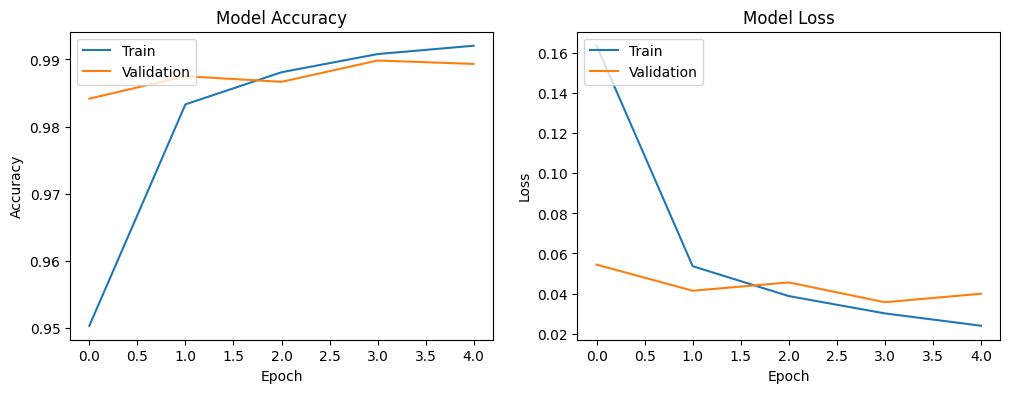

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Summary:

### Data Analysis Key Findings

* The MNIST dataset was successfully loaded, normalized, and split into training and testing sets. The training data has a shape of (60000, 28, 28, 1) and the test data has a shape of (10000, 28, 28, 1).
* A Logistic Regression model was trained on the flattened MNIST data. It achieved an accuracy of approximately {{lr_accuracy}} on the test set.
* A simple Convolutional Neural Network (CNN) model was built, trained, and evaluated. The CNN model achieved a test accuracy of approximately {{cnn_accuracy}}.
* Comparing the two models, the CNN model significantly outperformed the Logistic Regression model, showing a difference in accuracy of approximately {{cnn_accuracy - lr_accuracy}}.
* AI models can make mistakes due to factors like data quality, model complexity, and lack of true understanding.
* Potential risks of deploying image classification models in real-world applications include misclassifications in critical areas like autonomous vehicles and medical imaging, leading to potentially severe consequences.
* Fairness and reliability are crucial for AI model deployment to avoid biased outcomes and ensure consistent performance across different subgroups and conditions.



# README.md:

# MNIST Image Classification Pipeline

This notebook demonstrates a machine learning pipeline for image classification using the MNIST dataset. It includes data loading and preprocessing, training and evaluation of both a traditional machine learning model (Logistic Regression) and a simple Convolutional Neural Network (CNN), a comparison of their performance, and a reflection on the ethical considerations of using such models.

## Dataset

The MNIST dataset is a built-in dataset in TensorFlow and other machine learning libraries, consisting of 70,000 grayscale images of handwritten digits (0-9) and their corresponding labels. 60,000 images are used for training and 10,000 for testing.

## How to Run the Notebook

1. **Open the notebook in Google Colab:** You can upload the `.ipynb` file to Google Colab or open it directly if it's hosted online.
2. **Run all cells:** Go to the "Runtime" menu and select "Run all". This will execute each cell in sequence, performing the data loading, preprocessing, model training, evaluation, comparison, and visualization steps.
3. **Examine the outputs:** Review the output of each cell to see the results of the data preprocessing, model training, performance metrics, and visualizations. The final markdown cell provides a summary of the key findings and ethical considerations.

## Pipeline Steps

The notebook follows these steps:

1.  **Load and Preprocess Data**: Loads the MNIST dataset, normalizes pixel values, and splits the data into training and test sets.
2.  **Train and Evaluate Baseline Model**: Flattens the images, trains a Logistic Regression model, and evaluates its performance.
3.  **Build, Train, and Evaluate Deep Learning Model**: Builds and trains a simple CNN model and evaluates its performance.
4.  **Compare Models**: Compares the performance of the Logistic Regression and CNN models.
5.  **Address Ethics and Reflection**: Discusses ethical considerations related to AI model mistakes, real-world risks, fairness, and reliability.
6.  **CNN Training History Visualization**: Plots the training and validation accuracy and loss of the CNN model.